# **Comparing Regression Models**


This jupyter notebook compare several regression ML algorithms build for prdiction pIC50 for beta secretase 1 inhibitors.
LazyPredict is a Python library that simplifies the process of training and comparing machine learning models.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! pip install lazypredict

In [7]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 4.9 MB/s eta 0:00:00


In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [17]:
#Load dataset

file1 = "/content/drive/MyDrive/bioactivity/beta_secretase1_bioactivity_data_pIC50_rdkit_descriptors.csv"
df = pd.read_csv(file1)
df.head()

,molecule_chembl_id,canonical_smiles,pIC50,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.38,14.03,-2.20,14.03,0.02,0.04,999.09,932.56,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.70,13.60,-1.57,13.60,0.10,0.04,893.01,828.49,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.34,13.24,-1.30,13.24,0.11,0.08,751.99,690.50,...,1,0,0,0,0,0,0,0,0,0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,5.05,13.42,-1.31,13.42,0.12,0.10,737.90,682.46,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5.25,13.72,-1.36,13.72,0.11,0.07,828.02,766.53,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# x, y data

x = df.iloc[:,3:]
y = df.pIC50

In [19]:
x.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.03,-2.20,14.03,0.02,0.04,999.09,932.56,998.46,390,0,...,0,0,0,0,0,0,0,0,0,0
1,13.60,-1.57,13.60,0.10,0.04,893.01,828.49,892.45,352,0,...,0,0,0,0,0,0,0,0,0,0
2,13.24,-1.30,13.24,0.11,0.08,751.99,690.50,751.42,294,0,...,1,0,0,0,0,0,0,0,0,0
3,13.42,-1.31,13.42,0.12,0.10,737.90,682.46,737.40,290,0,...,0,0,0,0,0,0,0,0,0,0
4,13.72,-1.36,13.72,0.11,0.07,828.02,766.53,827.45,324,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y.head()

,pIC50
0,6.38
1,8.70
2,6.34
3,5.05
4,5.25


In [21]:
# Examine X dimension
x.shape

(10574, 208)

# **Remove low variance features**

Features with low variance across samples are often not very informative in machine learning, as they do not vary much between data points. VarianceThreshold is a simple feature selection method that removes all features with variance below a certain threshold. Following code removes features from the dataset X that have a variance below 0.16.

In [22]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x = selection.fit_transform(x)
x.shape

(10574, 131)

77 RDkit features were removed due to low variance.

In [24]:
# Train, Test dataset splitting

# Perform data splitting using 80/20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Compare ML algorithms**

In [25]:
# Initialize and build the lazyregressor

lr = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = lr.fit(x_train, x_train, y_train, y_train)
models_test,predictions_test = lr.fit(x_train, x_test, y_train, y_test)

 98%|█████████▊| 41/42 [04:52<00:04,  4.82s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18638
[LightGBM] [Info] Number of data points in the train set: 8459, number of used features: 130
[LightGBM] [Info] Start training from score 6.580907


100%|██████████| 42/42 [04:53<00:00,  7.00s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [04:27<00:04,  4.55s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18638
[LightGBM] [Info] Number of data points in the train set: 8459, number of used features: 130
[LightGBM] [Info] Start training from score 6.580907


100%|██████████| 42/42 [04:30<00:00,  6.43s/it]


In [26]:
# Performance on the training set
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.91,0.91,0.40,1.04
ExtraTreeRegressor,0.91,0.91,0.40,0.36
ExtraTreesRegressor,0.91,0.91,0.40,25.01
GaussianProcessRegressor,0.91,0.91,0.40,67.15
RandomForestRegressor,0.89,0.89,0.45,70.57
XGBRegressor,0.88,0.88,0.46,2.68
BaggingRegressor,0.87,0.87,0.49,7.93
LGBMRegressor,0.78,0.79,0.63,1.91
HistGradientBoostingRegressor,0.78,0.79,0.63,2.53


In [27]:
# Performance on the test set
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.65,0.67,0.78,5.45
LGBMRegressor,0.64,0.66,0.78,2.29
RandomForestRegressor,0.63,0.65,0.80,80.86
XGBRegressor,0.62,0.64,0.81,4.65
SVR,0.61,0.64,0.82,9.42
NuSVR,0.61,0.63,0.82,10.17
KNeighborsRegressor,0.60,0.62,0.83,0.32
BaggingRegressor,0.59,0.62,0.83,7.34
ExtraTreesRegressor,0.59,0.62,0.84,24.22


# **Visualization of model performance**

[(0.0, 1.0)]

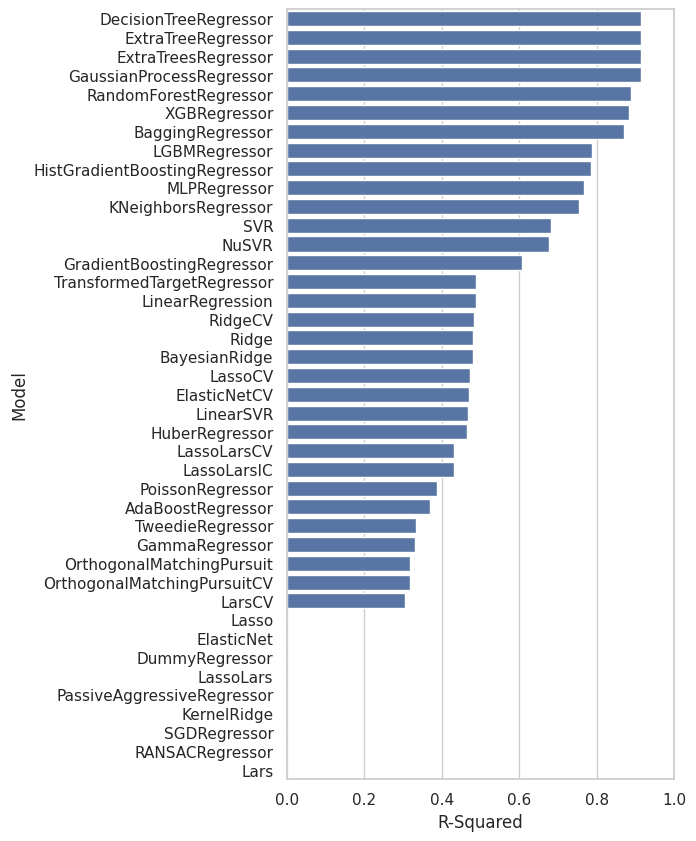

In [28]:
# Bar plot of R-squared values for training set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

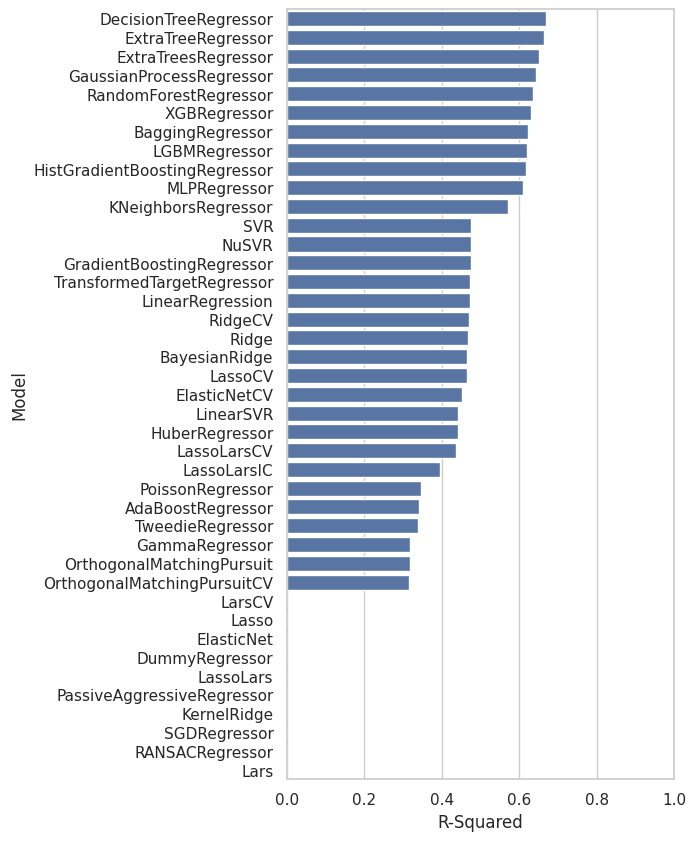

In [38]:
# Bar plot of R-squared values for test set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

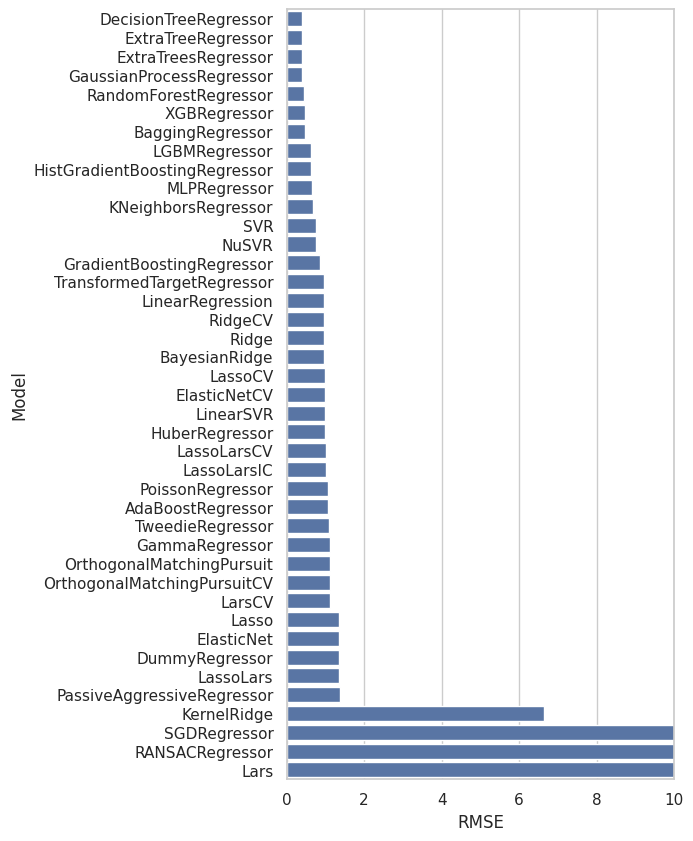

In [39]:
# Bar plot of RMSE values for training set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

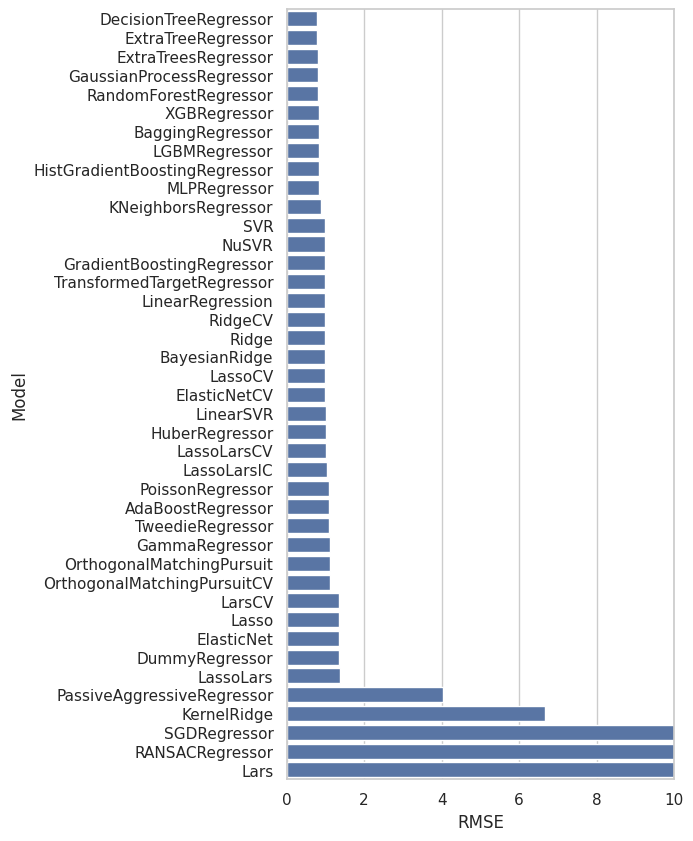

In [40]:
# Bar plot of RMSE values for test set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))